In [1]:
import pandas as pd
bikes = pd.read_pickle('https://github.com/rogovich/Data/blob/master/data/BikesDataVars.pkl?raw=true')

In [2]:
month_temp = bikes.groupby(bikes['Date'].dt.month)['Temperature'].mean()

In [3]:
month_temp.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Date')

In [4]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

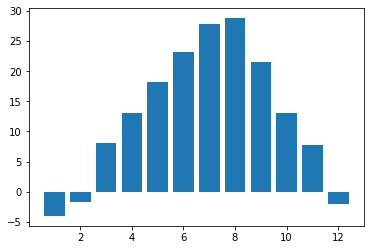

In [5]:
plt.bar(month_temp.index, month_temp) # простой вариант работы

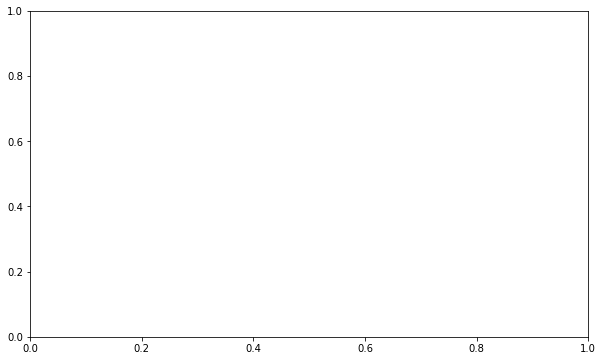

In [6]:
fig, ax = plt.subplots(figsize = (10, 6)) # настраиваемый вариант работы

In [7]:
# ax в ней хранятся объекты, составляющие график
# fig это просто само полотно 

In [8]:
ax.bar(month_temp.index, month_temp)

<BarContainer object of 12 artists>

In [9]:
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()

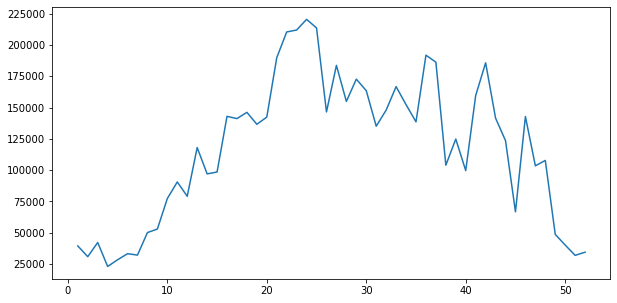

In [14]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(bikes_sum)
fig.savefig('my_plot.pdf')

In [10]:
seasons = bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()

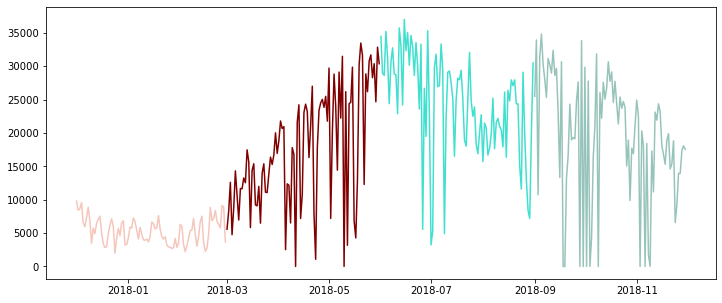

In [11]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(seasons['Autumn'], c='#97c4ba')
ax.plot(seasons['Winter'], c='#f5c6bc') # мы можем вернуться к графику через ах и добавить в него что-либо
ax.plot(seasons['Spring'], c='maroon')
ax.plot(seasons['Summer'], c='turquoise')

In [12]:
temperature = bikes.groupby(['Seasons', 'Date'])['Temperature'].mean()

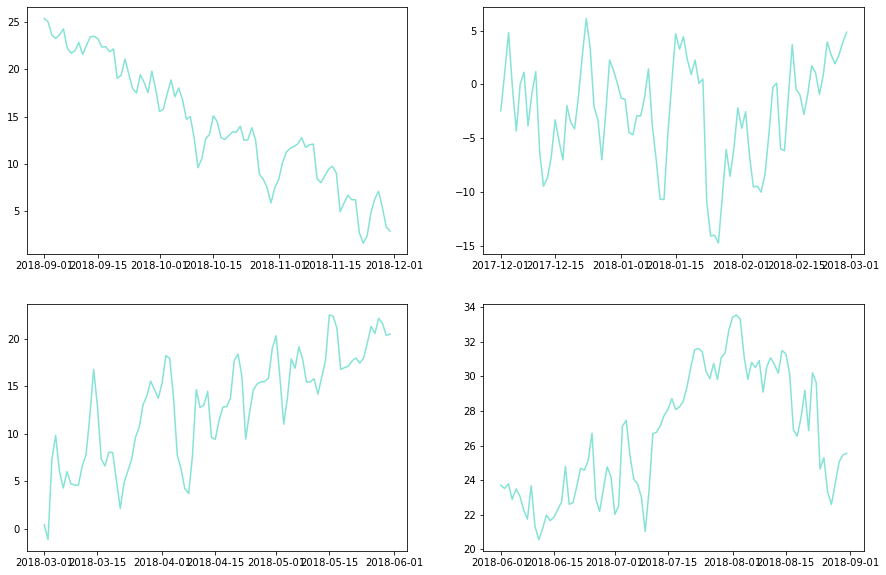

In [13]:
fig, ax = plt.subplots(2,2, figsize = (15,10)) # можем создать сколько-то графиков в ряду и в колонке

ax[0][0].plot(temperature['Autumn'], c='#84e3d6')
ax[0][1].plot(temperature['Winter'], c='#84e3d6')
ax[1][0].plot(temperature['Spring'], c='#84e3d6')
ax[1][1].plot(temperature['Summer'], c='#84e3d6')

In [14]:
for row in ax:
    #print(row)
    for col in row:
        print(col)

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


In [15]:
for axis in ax.ravel(): # переделывает многомерный массив в одномерный
    print(axis) 

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


In [16]:
temp_mean = bikes['Temperature'].mean()

Text(0.5, 0.98, 'Daily temperature average by season')

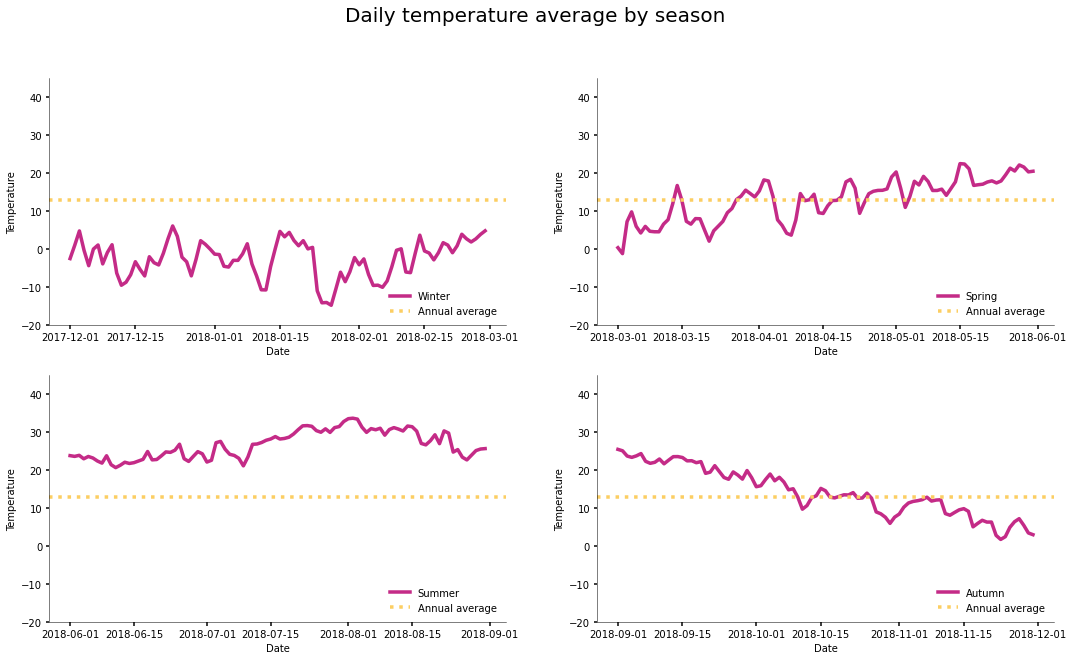

In [17]:
fig, ax = plt.subplots(2,2, figsize = (18,10))
for season,axis in zip(bikes['Seasons'].unique(), ax.ravel()):
    axis.plot(temperature[season], c='#c42b87', lw=3.5) # lw - толщина линии
    axis.set_ylim(-20, 45) # лимит для y
    axis.set_xlabel('Date')
    axis.set_ylabel('Temperature')
    axis.axhline(temp_mean, c='#fcce62', ls='dotted', lw=3.5) # нарисовать горизонтальную линию на каком-то уровне, так же можно axvline # ls - стиль линии
    axis.legend([season, 'Annual average'], frameon=False, loc=4)
    axis.spines['top'].set_visible(False) # сделать невидимой границу
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_lw(0.5)
    axis.spines['bottom'].set_lw(0.5)
    axis.xaxis.set_tick_params(width=1.5) # tick - засечка
    axis.yaxis.set_tick_params(width=1.5)
    
fig.suptitle('Daily temperature average by season', fontsize=20) # название для всего графика

In [114]:
fig.savefig('ubergraph.pdf')

In [73]:
temperature.describe()

count    365.000000
mean      12.877814
std       11.545494
min      -14.737500
25%        3.950000
50%       13.837500
75%       22.435417
max       33.691667
Name: Temperature, dtype: float64

In [119]:
import numpy as np

In [123]:
x = np.array([[2,5,6], [3,4,6], [2,1,1]])

In [124]:
for item in x.ravel():
    print(item)

2
5
6
3
4
6
2
1
1


In [128]:
bikes['Bank Holiday'] = np.where(bikes['Date'].dt.day_name().isin(['Saturday', 'Sunday'])
                                 + bikes['Holiday'], 1, 0)
bikes['Rainfall and Snowfall'] = bikes['Rainfall'] * 10 + bikes['Snowfall']

bikes_sum = bikes.groupby('Date')['Rental Count'].sum()
temp_av = bikes.groupby('Date')['Temperature'].mean()
rainsnow_av = bikes.groupby('Date')['Rainfall and Snowfall'].mean()
weekend = bikes.groupby('Date')['Bank Holiday'].max()

bikes_date = pd.concat([bikes_sum, temp_av, rainsnow_av, weekend], axis=1)

In [129]:
bikes_date

,Rental Count,Temperature,Rainfall and Snowfall,Bank Holiday
Date,,,,
2017-12-01,9802,-2.454167,0.000000,0
2017-12-02,8404,1.320833,0.000000,1
2017-12-03,8644,4.777083,1.666667,1
2017-12-04,9556,-0.304167,0.041667,0
2017-12-05,6578,-4.241667,0.000000,0
...,...,...,...,...
2018-11-26,13934,6.320833,0.120833,0
2018-11-27,13964,6.631250,0.000000,0
2018-11-28,17378,5.316667,0.000000,0


In [132]:
bikes_date.head()

,Rental Count,Temperature,Rainfall and Snowfall,Bank Holiday
Date,,,,
2017-12-01,9802,-2.454167,0.000000,0
2017-12-02,8404,1.320833,0.000000,1
2017-12-03,8644,4.777083,1.666667,1
2017-12-04,9556,-0.304167,0.041667,0
2017-12-05,6578,-4.241667,0.000000,0


Text(0, 0.5, 'Арендованные велосипеды')

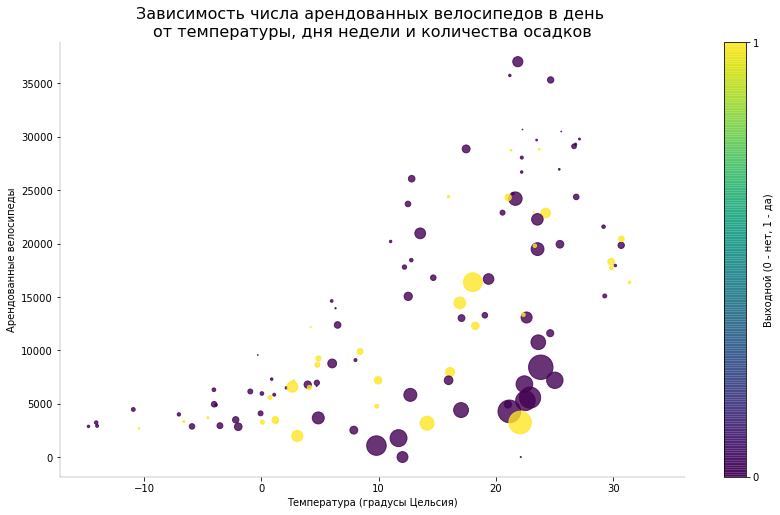

In [151]:
fig, ax = plt.subplots(figsize=(14,8))
graph = ax.scatter(bikes_date['Temperature'], bikes_date['Rental Count'],
          c=bikes_date['Bank Holiday'], s=bikes_date['Rainfall and Snowfall']*15,
          alpha=0.8) # график рассеяния # зав - у, нез - х
plt.colorbar(graph, label = 'Выходной (0 - нет, 1 - да)', ticks=[0,1])


ax.set_title('Зависимость числа арендованных велосипедов в день \nот температуры, дня недели и количества осадков', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.2)
ax.spines['bottom'].set_linewidth(0.2)
ax.set_xlabel('Температура (градусы Цельсия)', fontsize=10)
ax.set_ylabel('Арендованные велосипеды', fontsize=10)

In [169]:
gapminder = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/gapminderData.csv')
gapminder['continent'] = pd.Categorical(gapminder['continent'])
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


Text(0.5, 1.0, 'Зависимость средней продолжительности жизни\n от ВВП на душу. Год: 1952')

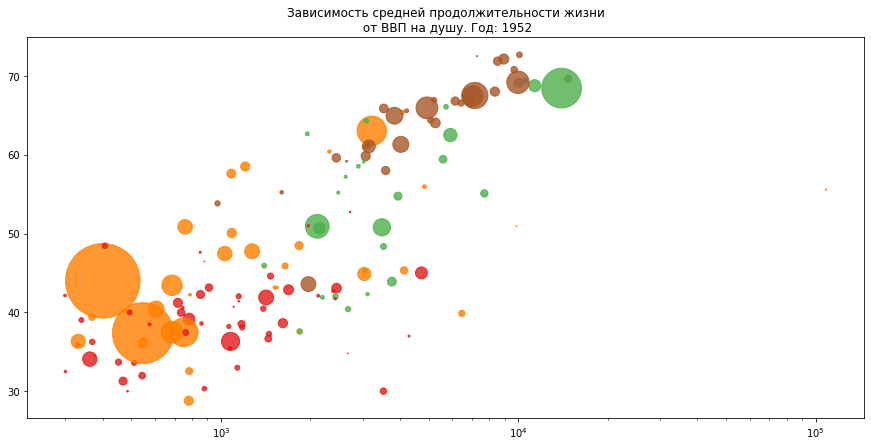

In [174]:
gapminder_year = gapminder[gapminder['year'] == 1952]
year = 1952
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(gapminder_year['gdpPercap'], gapminder_year['lifeExp'],
          s=gapminder_year['pop'] / 100000, alpha=0.8,
          c=gapminder_year['continent'].cat.codes,
          cmap='Set1') 
ax.set_xscale('log')
ax.set_title(f'Зависимость средней продолжительности жизни\n от ВВП на душу. Год: {year}')

Text(0.5, 0.98, 'Daily temperature average by season')

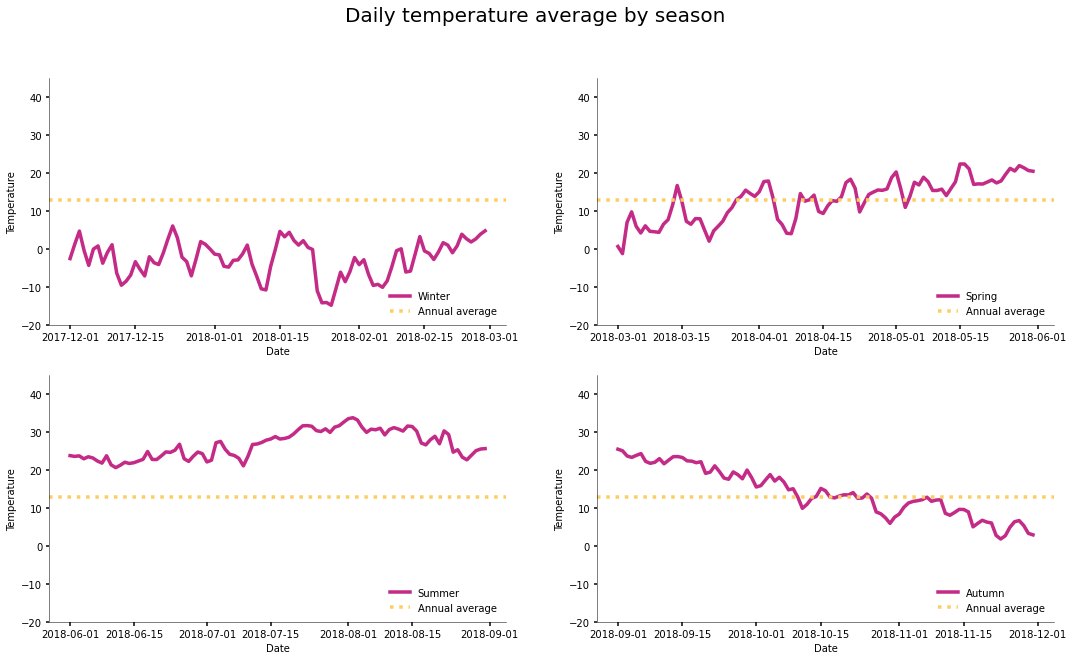

In [200]:
fig, ax = plt.subplots(2,2, figsize = (18,10))
for season,axis in zip(bikes['Seasons'].unique(), ax.ravel()):
    axis.plot(temperature[season], c='#c42b87', lw=3.5) # lw - толщина линии
    axis.set_ylim(-20, 45) # лимит для y
    axis.set_xlabel('Date')
    axis.set_ylabel('Temperature')
    axis.axhline(temp_mean, c='#fcce62', ls='dotted', lw=3.5) # нарисовать горизонтальную линию на каком-то уровне, так же можно axvline # ls - стиль линии
    axis.legend([season, 'Annual average'], frameon=False, loc=4)
    axis.spines['top'].set_visible(False) # сделать невидимой границу
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_lw(0.5)
    axis.spines['bottom'].set_lw(0.5)
    axis.xaxis.set_tick_params(width=1.5) # tick - засечка
    axis.yaxis.set_tick_params(width=1.5)
    
fig.suptitle('Daily temperature average by season', fontsize=20) # название для всего графика

In [187]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,7))

for year, axis in zip(gapminder['year'].unique(), ax.ravel()):
    axis.scatter(gapminder['gdpPercap'], gapminder['lifeExp'],
    s=gapminder_year['pop'] / 100000, alpha=0.8,
    c=gapminder_year['continent'].cat.codes,
    cmap='Set1') 
    ax.set_xscale('log')
    ax.set_title(f'Зависимость средней продолжительности жизни\n от ВВП на душу. Год: {year}')
    